<a href="https://colab.research.google.com/github/crea0414/1st_CVDL/blob/master/Day003_color_spave_op_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 範例

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變到 HSL color space 來調整飽和度
2. 對灰階圖實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮


In [0]:
import cv2, os
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline
dir = './drive/My Drive/First_CV_DL191125'
img_path = os.path.join(dir, 'lena.png')
img = cv2.imread(img_path)

## 改變飽和度

- 轉換成 HLS color space, 改變 s channel 的值

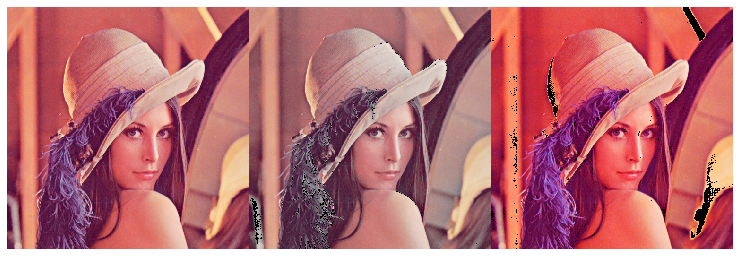

In [3]:
# 為了要改變飽和度，我們先把 color space 轉成 HSL 格式 (OpenCV 表示順序是 HLS)
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
change_percentage = 0.2

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HLS color space 減少飽和度
img_hls_down = img_hls.astype('float32')
img_hls_down[..., -1] = img_hls_down[..., -1]/255 - change_percentage
img_hls_down[img_hls_down[..., -1] < 0] = 0
img_hls_down[..., -1] = img_hls_down[..., -1]*255
img_hls_down = img_hls_down.astype('uint8')

# 在 HLS color space 增加飽和度
img_hls_up = img_hls.astype('float32')
img_hls_up[..., -1] = img_hls_up[..., -1]/255 + change_percentage
img_hls_up[img_hls_up[..., -1] > 1] = 1
img_hls_up[..., -1] = img_hls_up[..., -1]*255
img_hls_up = img_hls_up.astype('uint8')

# 轉換
img_hls_down = cv2.cvtColor(img_hls_down, cv2.COLOR_HLS2RGB)
img_hls_up = cv2.cvtColor(img_hls_up, cv2.COLOR_HLS2RGB)

# 組合圖片 + 顯示圖片
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hls_change = np.hstack((img_RGB, img_hls_down, img_hls_up))

plt.figure(figsize=(13, 7))
plt.imshow(img_hls_change)
plt.axis('off');


## 直方圖均衡

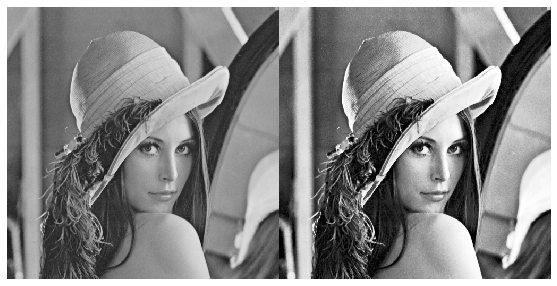

In [4]:
# 轉為灰階圖片
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 灰階圖片直方圖均衡
img_gray_equal = cv2.equalizeHist(img_gray)

# 組合圖片 + 顯示圖片
img_gray_equalHist = np.hstack((img_gray, img_gray_equal))

plt.figure(figsize=(10, 5))
plt.imshow(img_gray_equalHist, cmap='gray')
plt.axis('off');

## 調整對比 / 明亮

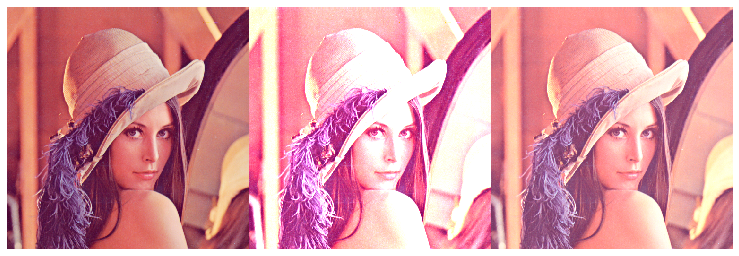

In [5]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)

add_contrast = cv2.convertScaleAbs(img_RGB, alpha=2.0, beta=0)
add_lighness = cv2.convertScaleAbs(img_RGB, alpha=1.0, beta=50)

# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img_RGB, add_contrast, add_lighness))

plt.figure(figsize=(13, 7))
plt.imshow(img_contrast_light, cmap='gray')
plt.axis('off');

# 作業

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變 color space 來調整飽和度
2. 實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

## 改變飽和度

- 轉換成 HSV color space, 改變 s channel 的值

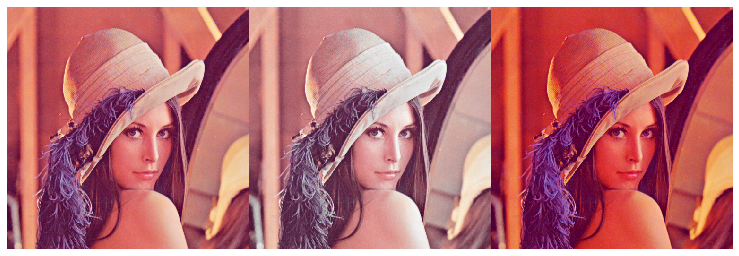

In [6]:
# 為了要改變飽和度，我們先把 color space 轉成 HSV 格式
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
change_percentage = 0.2

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HSV color space 減少飽和度
img_hsv_down = img_hsv.copy().astype('float32')
img_hsv_down[:,:,1] = (np.clip(img_hsv_down[:,:,1]/255. - change_percentage, 0, 1)*255)
img_hsv_down = img_hsv_down.astype('uint8')
# 在 HSV color space 增加飽和度
img_hsv_up = img_hsv.copy().astype('float32')
img_hsv_up[:,:,1] = (np.clip(img_hsv_up[:,:,1]/255 + change_percentage, 0, 1)*255)
img_hsv_up = img_hsv_up.astype('uint8')

# 轉換 color space 回 RGB
img_hsv_down = cv2.cvtColor(img_hsv_down, cv2.COLOR_HSV2RGB)
img_hsv_up = cv2.cvtColor(img_hsv_up, cv2.COLOR_HSV2RGB)

# 組合圖片 + 顯示圖片
img_hsv_change = np.hstack((img_RGB, img_hsv_down, img_hsv_up))
plt.figure(figsize=(13, 7))
plt.imshow(img_hsv_change)
plt.axis('off');

## 直方圖均衡

1. case 1: 把彩圖拆開對每個 channel 個別做直方圖均衡再組合起來
2. case 2: 轉換 color space 到 HSV 之後對其中一個 channel 做直方圖均衡

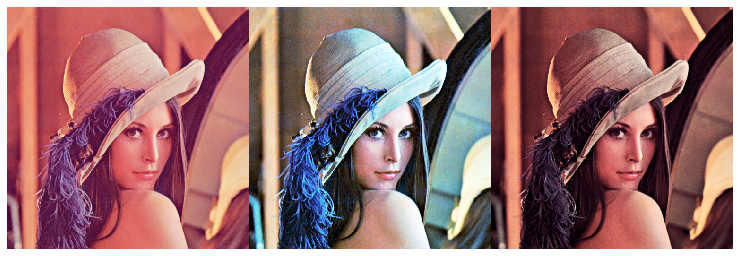

In [7]:
# case 1
# 每個 channel 個別做直方圖均衡

equalHist_by_channel = [cv2.equalizeHist(img_RGB[:,:,0])[:,:,np.newaxis],
                        cv2.equalizeHist(img_RGB[:,:,1])[:,:,np.newaxis],
                        cv2.equalizeHist(img_RGB[:,:,2])[:,:,np.newaxis]]

# 組合經過直方圖均衡的每個 channel
img_bgr_equal = np.concatenate(equalHist_by_channel, axis=-1)


# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
img_hsv_equal = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HSV)
img_hsv_equal[:,:,-1] = cv2.equalizeHist(img_hsv_equal[:,:,-1])
img_hsv_equal = cv2.cvtColor(img_hsv_equal, cv2.COLOR_HSV2RGB)
# 組合圖片 + 顯示圖片
img_bgr_equalHist = np.hstack((img_RGB, img_bgr_equal, img_hsv_equal))
plt.figure(figsize=(13, 7))
plt.imshow(img_bgr_equalHist)
plt.axis('off');

## 調整對比 / 明亮

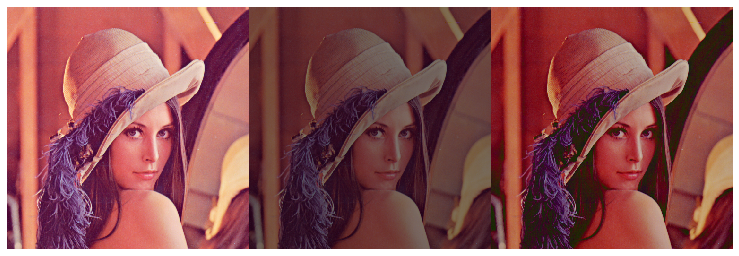

In [8]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img_RGB, alpha=0.5, beta=0)
add_lighness = cv2.convertScaleAbs(img_RGB, alpha=1.0, beta=-50)

# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img_RGB, add_contrast, add_lighness))
plt.figure(figsize=(13, 7))
plt.imshow(img_contrast_light)
plt.axis('off');